**Proyek: Analisis Korelasi Data Dunia Nyata**

**Tujuan:**

**Menggunakan Python dengan library seperti pandas, seaborn, dan matplotlib untuk menganalisis hubungan antara dua variabel atau lebih dalam sebuah dataset.**

---

In [67]:
import kagglehub


# Download latest version
path = kagglehub.dataset_download("rishidamarla/bollywood-movies-dataset")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\rishidamarla\bollywood-movies-dataset\versions\1


In [68]:
import os

# 'path' adalah variabel yang sama dari kode kagglehub Anda
# Kode ini akan membuat daftar semua file yang ada di dalam FOLDER 'path'
try:
    file_list = os.listdir(path)
    print("File di dalam folder dataset:")
    print(file_list)
except Exception as e:
    print("Terjadi error:", e)
    print("\nPastikan variabel 'path' Anda sudah benar dari langkah sebelumnya.")

File di dalam folder dataset:
['Data for repository.csv']


In [69]:
import pandas as pd
import os


# --- Pengaturan Tampilan Pandas ---
# Menjalankan ini sekali akan membuat semua output tabel lebih rapi

# Perintah untuk menampilkan semua kolom (tidak ada yang disembunyikan dengan '...')
pd.set_option('display.max_columns', None)

# Perintah untuk memperlebar tampilan output agar tidak terpotong ke bawah
pd.set_option('display.width', 1000)

############################



---

**Eksplorasi dan Pembersihan Data:**

- Muat dataset Anda menggunakan pandas.
- Periksa data yang hilang (missing values) dan putuskan cara menanganinya (misalnya, menghapus baris atau mengisi dengan nilai rata-rata/median).
- Pilih dua variabel numerik yang menurut Anda mungkin memiliki hubungan.



In [ ]:
# display dataset
# Variabel 'path' adalah lokasi folder dari kode kagglehub
# Kita gabungkan path folder dengan nama file untuk mendapatkan lokasi file yang lengkap
file_path = os.path.join(path, 'Data for repository.csv')

# Sekarang kita baca file CSV itu menggunakan Pandas
try:
    bollywood_movie_df = pd.read_csv(file_path)
    
    # Mari kita tampilkan 5 baris pertama dari data kita untuk memastikan semuanya berhasil
    print("Selamat! Data berhasil dimuat. Ini 5 baris pertamanya:")
    print('=' * 50)
    print(bollywood_movie_df.head())
    
except FileNotFoundError:
    print("Error: File tidak ditemukan. Pastikan nama file  sudah benar.")
except Exception as e:
    print("Terjadi error lain:", e)

print('=' * 50)

# 2. periksa missing values
missing_values = bollywood_movie_df.isna().sum()
print(f"Total missing values setiap kolom\n{missing_values}")

Selamat! Data berhasil dimuat. Ini 5 baris pertamanya:
         Movie Name Release Period Whether Remake Whether Franchise     Genre New Actor New Director New Music Director         Lead Star         Director   Music Director  Number of Screens  Revenue(INR)  Budget(INR)
0       Golden Boys         Normal             No                No  suspense       Yes           No                 No      Jeet Goswami       Ravi Varma    Baba Jagirdar                  5       5000000        85000
1     Kaccha Limboo        Holiday             No                No     drama       Yes           No                Yes  Karan Bhanushali    Sagar Ballary  Amardeep Nijjer                 75      15000000       825000
2  Not A Love Story        Holiday             No                No  thriller        No           No                 No        Mahie Gill  Ram Gopal Verma   Sandeep Chowta                525      75000000     56700000
3        Qaidi Band        Holiday             No                No     d

---

**Visualisasikan dan Hitung Korelasi:**

- Buat scatterplot menggunakan seaborn.scatterplot() atau matplotlib.pyplot.scatter() untuk memvisualisasikan hubungan antara dua variabel yang Anda pilih.
- Tambahkan garis tren menggunakan seaborn.lmplot() untuk melihat hubungan linear dengan lebih jelas.
- Hitung koefisien korelasi Pearson antara kedua variabel menggunakan metode .corr() dari pandas.



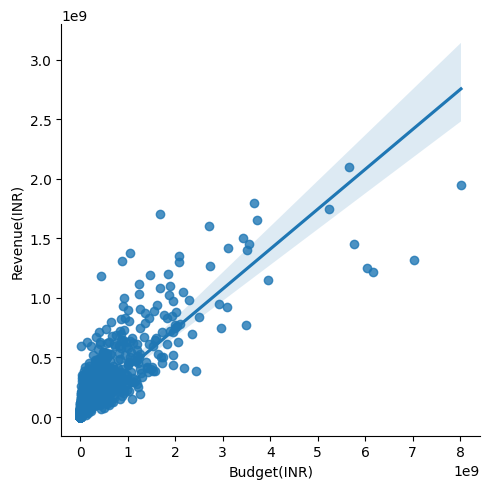

0.84


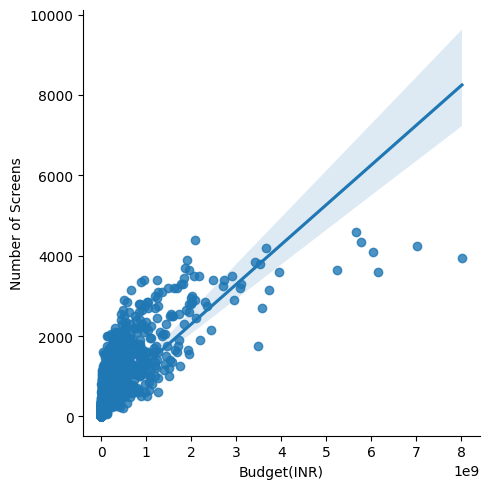

0.78


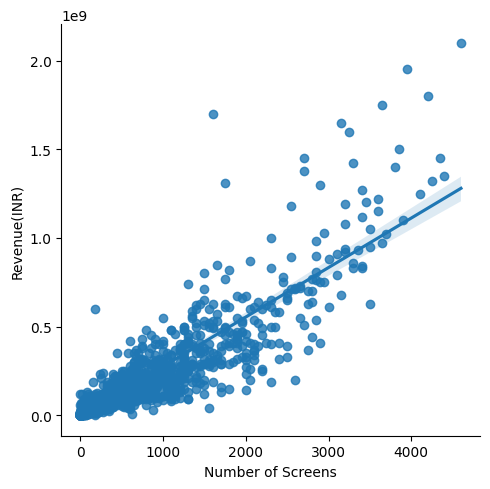

0.9


In [71]:
# visualisasi correlation variabel numerik  bugdet vs revenue
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(24, 24))
sns.lmplot(x='Budget(INR)', y='Revenue(INR)', data=bollywood_movie_df)
plt.show()

# hitung korelasi
coef = bollywood_movie_df['Budget(INR)'].corr(bollywood_movie_df['Revenue(INR)'])
print(coef.round(2))

#######
# visualisasi correlation budget vs layar yang di tampilkan di bioskop
sns.lmplot(x='Budget(INR)', y='Number of Screens', data=bollywood_movie_df)
plt.show()

# hitung korelasi
coef = bollywood_movie_df['Budget(INR)'].corr(bollywood_movie_df['Number of Screens'])
print(coef.round(2))

#########
# visualisasi correlation layar yang di tampilkan di bioskop vs revenue di tampilkan di bioskop
sns.lmplot(x='Number of Screens', y='Revenue(INR)', data=bollywood_movie_df)
plt.show()

# hitung korelasi
coef = bollywood_movie_df['Number of Screens'].corr(bollywood_movie_df['Revenue(INR)'])
print(coef.round(2))

----

**Analisis dan Interpretasi:**

**Tulis interpretasi Anda:**

- Berdasarkan nilai koefisien korelasi, seberapa kuat dan apa arah hubungannya?
- Apakah hasil numerik ini sesuai dengan apa yang Anda lihat di scatter plot?
- Pikirkan secara kritis: Apakah hubungan ini berarti sebab-akibat? Identifikasi setidaknya satu potensi variabel perancu (confounding variable) yang bisa menjelaskan korelasi ini.
- Jika hubungannya terlihat non-linear, pertimbangkan apakah transformasi data (seperti logaritma) bisa membantu.


**ketiganya cendrung positif saling berpengaruh bisa berarti sebab akibat bisa juga tidak tapi saya lebih menekankan ketiganya memiliki pengaruh yang sama. untuk variabel rancu saya akan memilih lead star dan music director saya berpendapat bahwa biasanya aktor top atau music director yang mengisi soundrack itu mungkin berpengaruh tetapi pada kenyataannya banyak kok bintang-bintang baru yang hadir dengan nuasa baru dalam film nya tetap mendapatkan popularitas. hubungan dari ketiga variable tersebut dari kasus kita semuanya linear jadi tidak perlu mempertimbangkan untuk menggunakan log/transformsai** 

**karna ini ada 3 variabel maka kita gunakan heatmap agar lebih mudah di baca**

---

**(Bonus) Buat Peta Panas Korelasi (Correlation Heatmap):**

- Jika dataset Anda memiliki beberapa variabel numerik, hitung matriks korelasi untuk semua pasangan variabel.
- Gunakan seaborn.heatmap() untuk memvisualisasikan matriks ini. Ini akan memberi Anda gambaran cepat tentang hubungan mana yang paling kuat dalam data Anda.

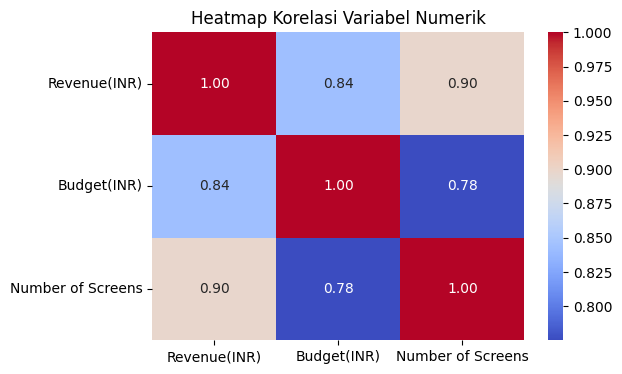

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Misalnya dataframe kamu bernama df
# Ambil hanya kolom numerik yang relevan
num_cols = ["Revenue(INR)", "Budget(INR)", "Number of Screens"]
df_num = bollywood_movie_df[num_cols]

# Hitung korelasi
corr = df_num.corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()


----

**additional**

**perbandingan rata-rata revenue per-periode rilis**

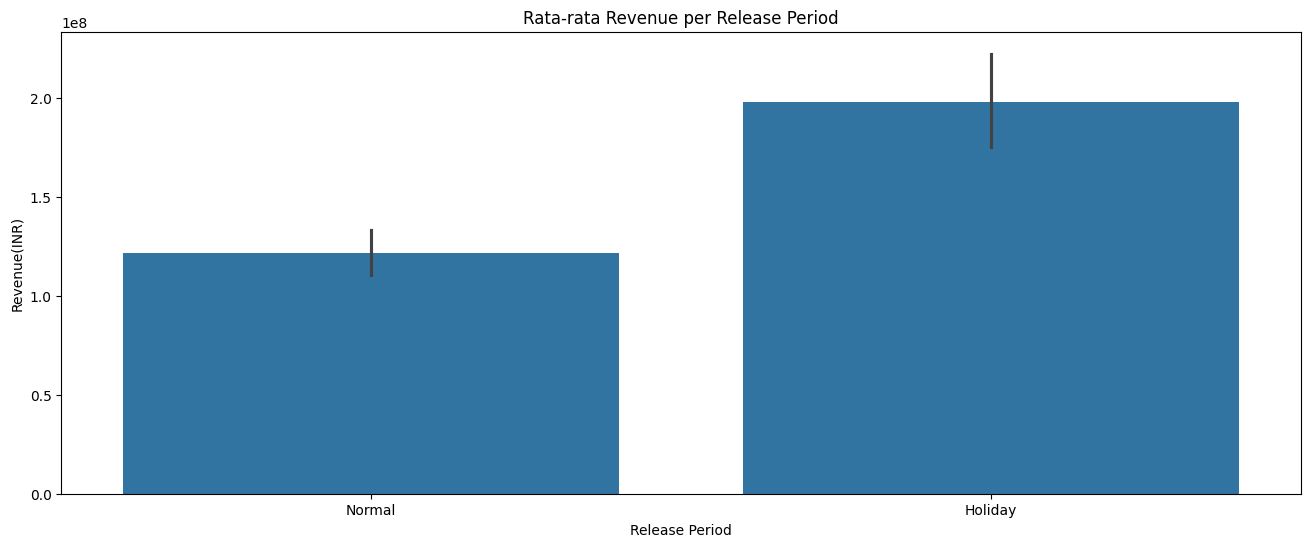

In [78]:
bollywood_movie_df.groupby('Release Period')["Revenue(INR)"].mean().sort_values()

plt.figure(figsize=(16, 6))
sns.barplot(x="Release Period", y="Revenue(INR)", data=bollywood_movie_df, estimator="mean")
plt.xticks(rotation=0)
plt.title("Rata-rata Revenue per Release Period")
plt.show()


In [ ]:
# top 3 berdasarkan revenue
top3 = bollywood_movie_df.sort_values(by="Revenue(INR)", ascending=False).head(3)
print(top3[["Movie Name", "Revenue(INR)", "Budget(INR)", "Number of Screens"]])


                       Movie Name  Revenue(INR)  Budget(INR)  Number of Screens
1240              Tiger Zinda Hai    2100000000   5651020000               4600
947   Bahubali 2 - The Conclusion    1950000000   8016120000               3950
1260         Prem Ratan Dhan Payo    1800000000   3654575000               4200
